# Load DB from MySQL

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Insert Database connection details
user = 'root'
password = 'mYsT4nd4rdQu3rYL4ngu4g3'
host = 'localhost'
database = 'nba_database'

# Create connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

In [3]:
# Define the table name
table_name = 'betting_and_game_table'

# Query the database and load data into a DataFrame
df = pd.read_sql(f'SELECT * FROM {table_name};', con=engine)

# Display the first few rows of the DataFrame
display(df)

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,Pace_Home,Pace_Away,Home_Possessions,Away_Possessions,ORtg_Home,ORtg_Away,DRtg_Home,DRtg_Away,NetRtg_Home,NetRtg_Away
0,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,159.0,159.0,93.64,94.00,107.859889,100.000000,100.000000,107.859889,7.859889,-7.859889
1,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,176.0,176.0,99.12,98.48,103.914447,97.481722,97.481722,103.914447,6.432725,-6.432725
2,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,165.0,165.0,91.40,93.00,107.950401,108.602151,108.602151,107.950401,-0.651749,0.651749
3,20700106,22007,1610612766,CHA,Charlotte Hornets,2007-11-14,CHA @ ATL,L,240,41.0,...,160.0,160.0,92.88,96.88,111.164944,112.510322,112.510322,111.164944,-1.345378,1.345378
4,20700123,22007,1610612760,OKC,Oklahoma City Thunder,2007-11-16,SEA @ ATL,W,290,47.0,...,198.0,198.0,115.52,113.64,92.797784,110.876452,110.876452,92.797784,-18.078668,18.078668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17108,22100241,22021,1610612748,MIA,Miami Heat,2021-11-20,MIA @ WAS,L,240,38.0,...,155.0,155.0,95.12,93.80,110.176619,116.417910,116.417910,110.176619,-6.241291,6.241291
17109,22100254,22021,1610612766,CHA,Charlotte Hornets,2021-11-22,CHA @ WAS,W,240,40.0,...,185.0,185.0,103.88,105.56,101.463227,105.721864,105.721864,101.463227,-4.258638,4.258638
17110,22100321,22021,1610612750,MIN,Minnesota Timberwolves,2021-12-01,MIN @ WAS,L,240,37.0,...,179.0,179.0,100.24,100.44,105.147646,116.885703,116.885703,105.147646,-11.738057,11.738057
17111,22100334,22021,1610612739,CLE,Cleveland Cavaliers,2021-12-03,CLE @ WAS,W,240,42.0,...,171.0,171.0,97.36,101.00,108.258012,110.297030,110.297030,108.258012,-2.039018,2.039018


# Model Training

## Logistic Regression

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
# Selecting features based on your EDA findings
features = [
    'HomeWinStreak', 'AwayWinStreak', 'EFG_AWAY', 'EFG_HOME', 'FG_PCT_HOME', 
    'FG_PCT_AWAY', 'HomeSpread_AtClose', 'AwayML_Prob', 'HomeML_Prob', 
    'FG3_PCT_HOME', 'FG3_PCT_AWAY', 'AST_HOME', 'AST_AWAY', 'NetRtg_Home', 'NetRtg_Away', 
    'Defensive_Efficiency_HOME', 'Defensive_Efficiency_AWAY', 'DREB_HOME', 'DREB_AWAY',
    'Home_PTS_RollAvg', 'Away_PTS_RollAvg'
]

# Define your target variables
X = df[features]
y = df['HomeWin']  # 1 if home team won, 0 if away team won

In [48]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
import joblib

# Save the splits
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [50]:
# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Saving the trained Logistic Regression Model

In [51]:
import joblib

# Save the model to a file
joblib_filename = 'logistic_regression_model.pkl'
joblib.dump(log_model, joblib_filename)

print(f"Model saved to {joblib_filename}")

Model saved to logistic_regression_model.pkl


### Loading the trained Logistic Regression Model

In [52]:
# Load the model from the file
log_model = joblib.load('logistic_regression_model.pkl')

# Use the model to make predictions
predictions = log_model.predict(X_test)

In [53]:
# Make predictions on the test set
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.90651475314052
Confusion Matrix:
[[1246  180]
 [ 140 1857]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1426
           1       0.91      0.93      0.92      1997

    accuracy                           0.91      3423
   macro avg       0.91      0.90      0.90      3423
weighted avg       0.91      0.91      0.91      3423



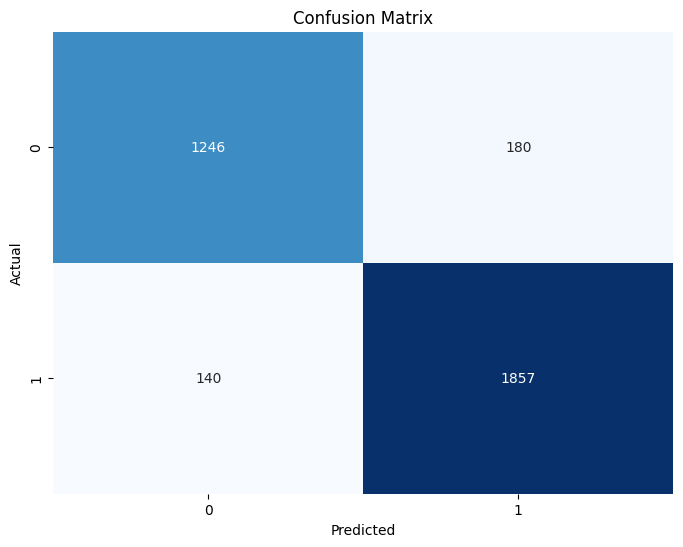

In [54]:
# Plot confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

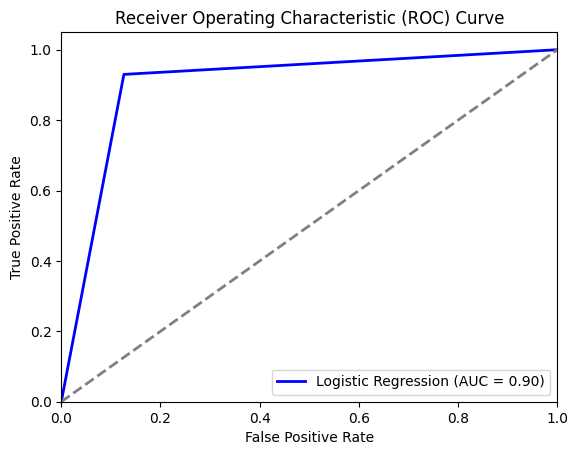

Logistic Regression AUC: 0.90


In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot ROC Curve for Logistic Regression
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Logistic Regression AUC: {roc_auc_logistic:.2f}")

The AUC has increased from 0.86 to 0.90, indicating a substantial improvement in the model's overall performance after removing Assist:Turnover Ratio and adding defensive stats. 

## XGBoost

In [6]:
import joblib
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the saved train-test splits
X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl')
y_test = joblib.load('y_test.pkl')

# Define features (if needed to check or further use)
features = [
    'HomeWinStreak', 'AwayWinStreak', 'EFG_AWAY', 'EFG_HOME', 'FG_PCT_HOME', 
    'FG_PCT_AWAY', 'HomeSpread_AtClose', 'AwayML_Prob', 'HomeML_Prob', 
    'FG3_PCT_HOME', 'FG3_PCT_AWAY', 'AST_HOME', 'AST_AWAY', 'NetRtg_Home', 'NetRtg_Away', 
    'Defensive_Efficiency_HOME', 'Defensive_Efficiency_AWAY', 'DREB_HOME', 'DREB_AWAY',
    'Home_PTS_RollAvg', 'Away_PTS_RollAvg'
]

# Fit the LabelEncoder on the target variable (y_train)
label_encoder = LabelEncoder()
y_train_labels = label_encoder.fit_transform(y_train)  # Fit the encoder using y_train
y_test_labels = label_encoder.transform(y_test)  # Transform y_test with the same encoder

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train_labels)

# Print best parameters from GridSearchCV
print("Best Parameters:")
print(grid_search.best_params_)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Feature Selection with SelectFromModel
selector = SelectFromModel(best_model, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Retrain the model with selected features
best_model.fit(X_train_selected, y_train_labels)

# Save the model to a file using joblib
joblib_filename = 'xgboost_model.pkl'
joblib.dump(best_model, joblib_filename)

print(f"Model saved to {joblib_filename}")

# Make predictions with the model
y_pred = best_model.predict(X_test_selected)

# Convert predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Print some predictions vs true values for inspection
print("Sample Predictions vs True Values:")
print(pd.DataFrame({'True': y_test_labels, 'Predicted': y_pred_labels}).head(10))

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
class_report = classification_report(y_test_labels, y_pred_labels)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:45:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:45:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:45:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8

Best Parameters:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:47:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model saved to xgboost_model.pkl
Sample Predictions vs True Values:
   True  Predicted
0     1          1
1     1          1
2     1          1
3     1          1
4     0          0
5     0          0
6     1          1
7     1          1
8     1          1
9     0          0
Accuracy: 0.8712
Confusion Matrix:
[[1190  236]
 [ 205 1792]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1426
           1       0.88      0.90      0.89      1997

    accuracy                           0.87      3423
   macro avg       0.87      0.87      0.87      3423
weighted avg       0.87      0.87      0.87      3423



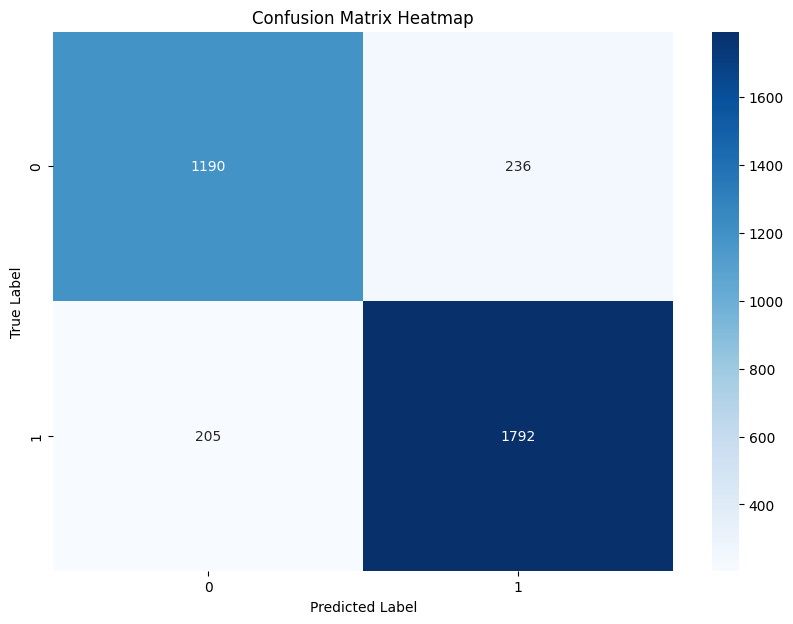

In [7]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

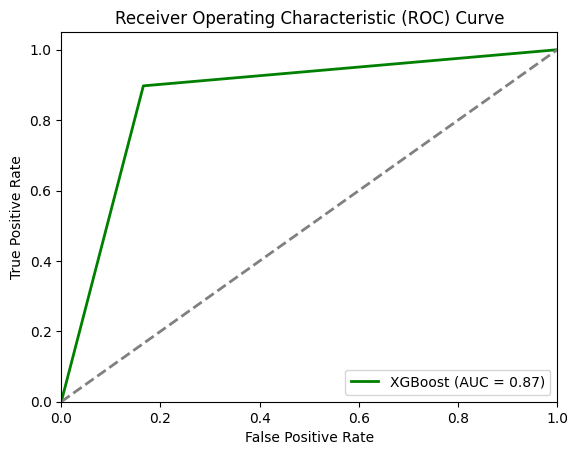

XGBoost AUC: 0.87


In [9]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for XGBoost
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_pred)
roc_auc_xgboost = auc(fpr_xgboost, tpr_xgboost)

# Plot ROC Curve for XGBoost
plt.plot(fpr_xgboost, tpr_xgboost, color='green', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgboost)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"XGBoost AUC: {roc_auc_xgboost:.2f}")

The AUC decreased from 0.87 to 0.75, indicating that the XGBoost model's performance has actually worsened after the feature modifications. This suggests that the changes made to the features might have introduced noise or removed important information that was beneficial for the model's predictions.

## Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score, KFold

### Logistic Regression

In [63]:
# Perform cross-validation
cv_score_lr = cross_val_score(LogisticRegression(max_iter=2000), X, y, cv=5)

# Print individual fold scores
print("Cross-Validation Scores:", cv_score_lr)

# Calculate mean accuracy as a percentage
mean_accuracy_lr = np.mean(cv_score_lr) * 100

# Print mean accuracy rounded to two decimal places
print("Mean Accuracy (%):", round(mean_accuracy_lr, 2))

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation Scores: [0.90359334 0.90739118 0.90855974 0.90590298 0.89830508]
Mean Accuracy (%): 90.48


The logistic regression model achieved an average accuracy of 90.48% across the 5-fold cross-validation. This indicates that the model performs well on different subsets of the data, suggesting its generalizability.

### XGBoost

In [64]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
cv_score_lr = cross_val_score(xgb.XGBClassifier(), X, y, cv=kf, scoring='accuracy')

# Print individual fold scores
print("Cross-Validation Scores:", cv_score_lr)

# Calculate mean accuracy as a percentage
mean_accuracy_lr = np.mean(cv_score_lr) * 100

# Print mean accuracy rounded to two decimal places
print("Mean Accuracy (%):", round(mean_accuracy_lr, 2))

Cross-Validation Scores: [0.89921122 0.9047619  0.8997955  0.90093513 0.89801286]
Mean Accuracy (%): 90.05


The mean accuracy of 89.95% suggests that the XGBoost model performs well on average across different subsets of the data.

### Findings
After evaluating both Logistic Regression and XGBoost, it was found that Logistic Regression outperforms XGBoost in terms of accuracy and overall evaluation metrics. Logistic Regression achieved an accuracy of approximately 90.65%, while XGBoost had an accuracy of 88.20%. The confusion matrix and classification report also show that Logistic Regression had better precision, recall, and F1-scores across both classes.

One reason why Logistic Regression performed better is that it is well-suited for simple binary classification tasks, like predicting the outcome of a sports event (win or loss). Logistic Regression directly models the probability of the binary outcome, and since this task is relatively straightforward, it can perform efficiently without needing complex model structures.

In contrast, XGBoost, while powerful for handling more complex and non-linear relationships, may not have provided significant advantages here because the dataset and features did not require the extra complexity that XGBoost offers. XGBoost tends to excel in scenarios with large datasets or intricate interactions between features, but for a simpler binary classification task, this complexity might lead to overfitting or unnecessary overhead, which could explain the lower accuracy.

Given the better performance of Logistic Regression, it will be the preferred model for implementation in the betting environment. Its higher accuracy and reliable classification make it the more appropriate choice for predicting the outcomes of sports events in this context.